# Analysis of Fire Incidents in New York

As a part of the challenges assigned by **The Data Incubator**

## Problem Statement

The New York City Fire Department keeps a log of detailed information on incidents handled by FDNY units. In this challenge we will work with a dataset that contains a record of incidents handled by FDNY units from 2013-2017. Download the [FDNY data set](https://data.cityofnewyork.us/api/views/tm6d-hbzd/rows.csv?accessType=DOWNLOAD). Also take a look at the [dataset landing page](https://data.cityofnewyork.us/Public-Safety/Incidents-Responded-to-by-Fire-Companies/tm6d-hbzd) and find descriptions of column names [here](https://data.cityofnewyork.us/api/views/tm6d-hbzd/files/1434d09c-fbf8-4450-8b42-9fe0c3b85fb3?download=true&filename=OPEN_DATA_FIRE_INCIDENTS_FILE_DESCRIPTION.xls).

### Loading and Visualisation

First, let us load the data set. 

In [1]:
import pandas as pd
dataset = pd.read_csv("Incidents_Responded_to_by_Fire_Companies.csv", low_memory=False)

Make a copy of the data to work on. 

In [2]:
data = dataset.copy()

Now, let us visualize it first. 

In [3]:
data.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
0,55672688,2147,"300 - Rescue, EMS incident, other",01/01/2013 12:00:20 AM,01/01/2013 12:14:23 AM,1.0,01/01/2013 12:20:06 AM,"1 - More than initial alarm, less than Signal 7-5",1186.0,"00 - Action taken, other",...,10454,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55672692,0818,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:00:37 AM,01/01/2013 12:09:03 AM,3.0,01/01/2013 12:30:06 AM,"1 - More than initial alarm, less than Signal 7-5",1769.0,86 - Investigate,...,10036,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55672693,9656,"300 - Rescue, EMS incident, other",01/01/2013 12:01:17 AM,01/01/2013 12:04:55 AM,1.0,01/01/2013 12:15:18 AM,"1 - More than initial alarm, less than Signal 7-5",841.0,"00 - Action taken, other",...,11418,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55672695,7412,412 - Gas leak (natural gas or LPG),01/01/2013 12:02:32 AM,01/01/2013 12:07:48 AM,4.0,01/01/2013 12:40:11 AM,"1 - More than initial alarm, less than Signal 7-5",2259.0,44 - Hazardous materials leak control & contai...,...,11103,5 - Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55672697,4019,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:01:49 AM,01/01/2013 12:06:27 AM,6.0,01/01/2013 12:24:56 AM,"1 - More than initial alarm, less than Signal 7-5",1387.0,86 - Investigate,...,11385,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning up the Data

Time to clean up the data!

Looks like not all the columns are not going to be useful for the exercise. I drop them here. 

In [4]:
data = data.drop(columns=['STANDPIPE_SYS_PRESENT_FLAG', 'AES_PRESENCE_DESC', 'DETECTOR_PRESENCE_DESC',
                          'FIRE_SPREAD_DESC', 'STORY_FIRE_ORIGIN_COUNT', 'FIRE_ORIGIN_BELOW_GRADE_FLAG', 'FLOOR',
                          'STREET_HIGHWAY', 'ACTION_TAKEN2_DESC', 'ACTION_TAKEN3_DESC', 'PROPERTY_USE_DESC'])

Few columns have alphanumneric data. I'm only interested in the numeric data here; I can always look up what they mean later. 

In [5]:
data['INCIDENT_TYPE_DESC']= data['INCIDENT_TYPE_DESC'].str.split(pat = "-").str[0] 
data['HIGHEST_LEVEL_DESC'] = data['HIGHEST_LEVEL_DESC'].str.split(pat = "-").str[0]
data['ACTION_TAKEN1_DESC'] = data['ACTION_TAKEN1_DESC'].str.split(pat = "-").str[0]
data['BOROUGH_DESC'] = data['BOROUGH_DESC'].str.split(pat = "-").str[0]
data['ZIP_CODE'] = data['ZIP_CODE'].str.split(pat = "-").str[0]

In [6]:
#This probably is useful as numeric data. 

data['INCIDENT_TYPE_DESC'] = data['INCIDENT_TYPE_DESC'].str.split(pat = "B").str[0]
data['INCIDENT_TYPE_DESC'] = data['INCIDENT_TYPE_DESC'].str.split(pat = "A").str[0]

We have three columns that have `datetime` data. I use the `infer_datetime_format=True` option to speed up the function. 

In [8]:
# Convert Datetime data

%timeit data['INCIDENT_DATE_TIME'] = pd.to_datetime(data.INCIDENT_DATE_TIME, infer_datetime_format=True)
%timeit data['ARRIVAL_DATE_TIME'] = pd.to_datetime(data.ARRIVAL_DATE_TIME, infer_datetime_format=True)
%timeit data['LAST_UNIT_CLEARED_DATE_TIME'] = pd.to_datetime(data.LAST_UNIT_CLEARED_DATE_TIME, infer_datetime_format=True)

20.7 ms ± 6.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
15 ms ± 3.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
14.1 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Exporting Clean Data

Good! Looks like we have cleaned up our data now. Let's visualize it first and then save it into a .csv that I can import later and start working from there. 

In [9]:
data.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,ZIP_CODE,BOROUGH_DESC,CO_DETECTOR_PRESENT_DESC
0,55672688,2147,300,2013-01-01 00:00:20,2013-01-01 00:14:23,1.0,2013-01-01 00:20:06,1,1186.0,00,10454,2,NaN
1,55672692,0818,735,2013-01-01 00:00:37,2013-01-01 00:09:03,3.0,2013-01-01 00:30:06,1,1769.0,86,10036,1,NaN
2,55672693,9656,300,2013-01-01 00:01:17,2013-01-01 00:04:55,1.0,2013-01-01 00:15:18,1,841.0,00,11418,5,NaN
3,55672695,7412,412,2013-01-01 00:02:32,2013-01-01 00:07:48,4.0,2013-01-01 00:40:11,1,2259.0,44,11103,5,NaN
4,55672697,4019,735,2013-01-01 00:01:49,2013-01-01 00:06:27,6.0,2013-01-01 00:24:56,1,1387.0,86,11385,5,NaN


In [10]:
data.to_csv("clean_data.csv", index=False)

In [11]:
# Can start from here later. 

import pandas as pd

data_mod = pd.read_csv("clean_data.csv", low_memory=False)
#                        , parse_dates=['INCIDENT_DATE_TIME ', 'ARRIVAL_DATE_TIME', 'LAST_UNIT_CLEARED_DATE_TIME']
#                        , infer_datetime_format=True)

In [12]:
data = data_mod.copy()

In [13]:
data.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,ZIP_CODE,BOROUGH_DESC,CO_DETECTOR_PRESENT_DESC
0,55672688,2147,300,2013-01-01 00:00:20,2013-01-01 00:14:23,1.0,2013-01-01 00:20:06,1.0,1186.0,0,10454.0,2,NaN
1,55672692,0818,735,2013-01-01 00:00:37,2013-01-01 00:09:03,3.0,2013-01-01 00:30:06,1.0,1769.0,86,10036.0,1,NaN
2,55672693,9656,300,2013-01-01 00:01:17,2013-01-01 00:04:55,1.0,2013-01-01 00:15:18,1.0,841.0,0,11418.0,5,NaN
3,55672695,7412,412,2013-01-01 00:02:32,2013-01-01 00:07:48,4.0,2013-01-01 00:40:11,1.0,2259.0,44,11103.0,5,NaN
4,55672697,4019,735,2013-01-01 00:01:49,2013-01-01 00:06:27,6.0,2013-01-01 00:24:56,1.0,1387.0,86,11385.0,5,NaN


In [14]:
# Convert Datetime data

%timeit data['INCIDENT_DATE_TIME'] = pd.to_datetime(data.INCIDENT_DATE_TIME, infer_datetime_format=True)
%timeit data['ARRIVAL_DATE_TIME'] = pd.to_datetime(data.ARRIVAL_DATE_TIME, infer_datetime_format=True)
%timeit data['LAST_UNIT_CLEARED_DATE_TIME'] = pd.to_datetime(data.LAST_UNIT_CLEARED_DATE_TIME, infer_datetime_format=True)


22.5 ms ± 7.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
17.3 ms ± 792 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
15.6 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
data.dtypes

IM_INCIDENT_KEY                         int64
FIRE_BOX                               object
INCIDENT_TYPE_DESC                      int64
INCIDENT_DATE_TIME             datetime64[ns]
ARRIVAL_DATE_TIME              datetime64[ns]
UNITS_ONSCENE                         float64
LAST_UNIT_CLEARED_DATE_TIME    datetime64[ns]
HIGHEST_LEVEL_DESC                    float64
TOTAL_INCIDENT_DURATION               float64
ACTION_TAKEN1_DESC                      int64
ZIP_CODE                              float64
BOROUGH_DESC                            int64
CO_DETECTOR_PRESENT_DESC               object
dtype: object

## Problems

### 1. What proportion of FDNY responses in this dataset correspond to the most common type of incident?

In [16]:
data['INCIDENT_TYPE_DESC'].value_counts()[:5]

300    823378
651    148924
735    118926
353    118264
710    117864
Name: INCIDENT_TYPE_DESC, dtype: int64

In [17]:
most_freq_incident = (data['INCIDENT_TYPE_DESC'] == 412).sum()
most_freq_incident

108362

Look like the most common incident is No. 412, happening 102410 times

In [18]:
count_row, count_column = data.shape

In [19]:
#Total number of data points. 

count_row

2277779

In [20]:
#Proportion of most common incident

prop_1 = most_freq_incident/count_row
prop_1

0.04757353544834683

### 2. What is the ratio of the average number of units that arrive to a scene of an incident classified as '111 - Building fire' to the number that arrive for '651 - Smoke scare, odor of smoke'?

In [21]:
sel1 = data.loc[(data['INCIDENT_TYPE_DESC'] == 111)]
sel1.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,ZIP_CODE,BOROUGH_DESC,CO_DETECTOR_PRESENT_DESC
90,55672965,2595,111,2013-01-01 00:58:10,2013-01-01 01:00:50,15.0,2013-01-01 04:15:20,7.0,11830.0,11,11219.0,4,NaN
198,55673299,2591,111,2013-01-01 02:22:56,2013-01-01 02:25:23,9.0,2013-01-01 07:29:44,7.0,18408.0,11,10456.0,2,NaN
439,55673870,1601,111,2013-01-01 06:20:49,2013-01-01 06:26:13,23.0,2013-01-01 10:32:28,2.0,15099.0,11,10030.0,1,NaN
491,55674012,7973,111,2013-01-01 07:59:48,2013-01-01 08:03:33,6.0,2013-01-01 08:19:37,1.0,1189.0,11,11373.0,5,NaN
568,55674170,1726,111,2013-01-01 09:47:27,2013-01-01 09:49:25,13.0,2013-01-01 11:11:42,7.0,5055.0,11,11207.0,4,NaN


In [22]:
sel2 = data.loc[(data['INCIDENT_TYPE_DESC'] == 651)]
sel2.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,ZIP_CODE,BOROUGH_DESC,CO_DETECTOR_PRESENT_DESC
7,55672700,9604,651,2013-01-01 00:04:03,2013-01-01 00:06:19,4.0,2013-01-01 00:11:21,1.0,438.0,86,11418.0,5,NaN
17,55672730,3219,651,2013-01-01 00:10:37,2013-01-01 00:13:49,6.0,2013-01-01 00:24:12,1.0,815.0,0,10462.0,2,NaN
19,55672739,2774,651,2013-01-01 00:11:03,2013-01-01 00:16:49,5.0,2013-01-01 00:27:46,1.0,1003.0,0,10452.0,2,NaN
22,55672751,2302,651,2013-01-01 00:15:52,2013-01-01 00:19:21,6.0,2013-01-01 00:31:50,1.0,958.0,0,10451.0,2,NaN
37,55672824,3734,651,2013-01-01 00:25:37,2013-01-01 00:28:31,6.0,2013-01-01 00:52:24,1.0,1607.0,0,11226.0,4,NaN


In [23]:
mean_111 = sel1['UNITS_ONSCENE'].mean()
mean_651 = sel2['UNITS_ONSCENE'].mean()

prop_2 = mean_111/mean_651
prop_2

2.7597595139775324

### 3. How many times more likely is an incident in Staten Island a false call compared to in Manhattan? The answer should be the ratio of Staten Island false call rate to Manhattan false call rate. A false call is an incident for which 'INCIDENT_TYPE_DESC' is '710 - Malicious, mischievous false call, other'.

In [24]:
sel3 = data.loc[(data['INCIDENT_TYPE_DESC'] == 710)]
sel3.head()
sel3.shape 

(117864, 13)

So, we don't have many false calls anyway. 

There was some information lost in converting the last row (BOROUGH_DESC) to just numbers. I add context here: 

1. Manhattan
2. Bronx
3. Staten Island
4. Brooklyn
5. Queens

In [25]:
manhattan_false_calls = (sel3['BOROUGH_DESC'] == 1).sum()

In [26]:
manhattan_false_calls

25240

In [27]:
staten_island_false_calls = (sel3['BOROUGH_DESC'] == 3).sum()

In [28]:
staten_island_false_calls

8276

In [29]:
prop_3= staten_island_false_calls/manhattan_false_calls
prop_3

0.327892234548336

### 4. Check the distribution of the number of minutes it takes between the time a '111 - Building fire' incident has been logged into the Computer Aided Dispatch system and the time at which the first unit arrives on scene. What is the third quartile of that distribution. Note: the number of minutes can be fractional (ie, do not round).

In [30]:
sel1.head()
pd.options.mode.chained_assignment = None #Reomve the flag for appending a new column. 

In [31]:
sel1['ARRIVAL_TIME'] = sel1['ARRIVAL_DATE_TIME'] - sel1['INCIDENT_DATE_TIME']

In [32]:
#Converting this to numerical minutes. 

sel1['ARRIVAL_TIME_IN_MINS'] = sel1['ARRIVAL_TIME'].dt.total_seconds().div(60).astype(float)

In [33]:
sel1.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,ZIP_CODE,BOROUGH_DESC,CO_DETECTOR_PRESENT_DESC,ARRIVAL_TIME,ARRIVAL_TIME_IN_MINS
90,55672965,2595,111,2013-01-01 00:58:10,2013-01-01 01:00:50,15.0,2013-01-01 04:15:20,7.0,11830.0,11,11219.0,4,NaN,00:02:40,2.666667
198,55673299,2591,111,2013-01-01 02:22:56,2013-01-01 02:25:23,9.0,2013-01-01 07:29:44,7.0,18408.0,11,10456.0,2,NaN,00:02:27,2.450000
439,55673870,1601,111,2013-01-01 06:20:49,2013-01-01 06:26:13,23.0,2013-01-01 10:32:28,2.0,15099.0,11,10030.0,1,NaN,00:05:24,5.400000
491,55674012,7973,111,2013-01-01 07:59:48,2013-01-01 08:03:33,6.0,2013-01-01 08:19:37,1.0,1189.0,11,11373.0,5,NaN,00:03:45,3.750000
568,55674170,1726,111,2013-01-01 09:47:27,2013-01-01 09:49:25,13.0,2013-01-01 11:11:42,7.0,5055.0,11,11207.0,4,NaN,00:01:58,1.966667


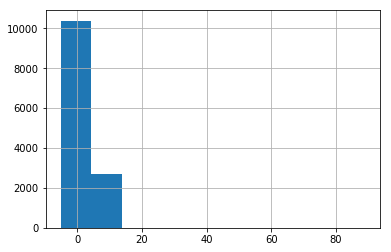

In [34]:
#Plotting the distribution

%matplotlib inline
import matplotlib.pyplot as plt

sel1['ARRIVAL_TIME_IN_MINS'].hist()

In [35]:
# The third quartile can be found using the "decribe" function, 

sel1['ARRIVAL_TIME_IN_MINS'].describe()

count    13069.000000
mean         3.591804
std          1.482594
min         -5.083333
25%          2.850000
50%          3.450000
75%          4.150000
max         88.983333
Name: ARRIVAL_TIME_IN_MINS, dtype: float64

In [36]:
#Or, using, 

prop_4 = sel1['ARRIVAL_TIME_IN_MINS'].quantile(0.75)
prop_4

4.15

Well, the answers match anyway. 

### 5. We can use the FDNY dataset to investigate at what time of the day people cook most. Compute what proportion of all incidents are cooking fires for every hour of the day by normalizing the number of cooking fires in a given hour by the total number of incidents that occured in that hour. Find the hour of the day that has the highest proportion of cooking fires and submit that proportion of cooking fires. A cooking fire is an incident for which 'INCIDENT_TYPE_DESC' is '113 - Cooking fire, confined to container'. Note: round incident times down. For example, if an incident occured at 22:55 it occured in hour 22.

In [37]:
data['INCIDENT_DATE_TIME'].head()

0   2013-01-01 00:00:20
1   2013-01-01 00:00:37
2   2013-01-01 00:01:17
3   2013-01-01 00:02:32
4   2013-01-01 00:01:49
Name: INCIDENT_DATE_TIME, dtype: datetime64[ns]

In [38]:
# Selecting the rounded off hour

data['INCIDENT_HOUR'] = data['INCIDENT_DATE_TIME'].dt.hour

In [39]:
#Count incidents per hour

incidents_per_hour = data['INCIDENT_HOUR'].value_counts()

In [40]:
incidents_per_hour_sorted = incidents_per_hour.sort_index()
incidents_per_hour_sorted.head()

0    71631
1    57394
2    47079
3    41313
4    39658
Name: INCIDENT_HOUR, dtype: int64

`incidents_per_hour_sorted` gives the number of incidents every hour. Let's narrow down our data to Cooking incidents. 

In [41]:
sel4 = data.loc[(data['INCIDENT_TYPE_DESC'] == 113)]
sel4.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,ZIP_CODE,BOROUGH_DESC,CO_DETECTOR_PRESENT_DESC,INCIDENT_HOUR
53,55672876,1380,113,2013-01-01 00:34:10,2013-01-01 00:37:52,3.0,2013-01-01 00:49:43,1.0,933.0,11,11694.0,5,NaN,0
58,55672892,1201,113,2013-01-01 00:38:51,2013-01-01 00:42:40,6.0,2013-01-01 00:57:58,1.0,1147.0,11,11691.0,5,NaN,0
120,55673073,2538,113,2013-01-01 01:23:26,2013-01-01 01:27:05,5.0,2013-01-01 01:37:33,1.0,847.0,11,10456.0,2,NaN,1
248,55673417,0688,113,2013-01-01 03:00:44,2013-01-01 03:06:52,5.0,2013-01-01 03:13:50,1.0,786.0,11,11221.0,4,NaN,3
329,55673603,0574,113,2013-01-01 04:16:58,2013-01-01 04:20:21,5.0,2013-01-01 04:34:42,1.0,1064.0,11,10011.0,1,NaN,4


In [42]:
#Doing the same analysis as above for cooking incidents, 

cooking_incidents_per_hour = sel4['INCIDENT_HOUR'].value_counts()

In [43]:
cooking_incidents_per_hour_sorted = cooking_incidents_per_hour.sort_index()
cooking_incidents_per_hour_sorted.head()

0    2047
1    1571
2    1203
3    1059
4     951
Name: INCIDENT_HOUR, dtype: int64

In [44]:
ratio_of_cooking_incidents = cooking_incidents_per_hour_sorted/incidents_per_hour_sorted
prop_5 = max(ratio_of_cooking_incidents)
prop_idx = ratio_of_cooking_incidents.idxmax()
print(prop_5,prop_idx)

0.050846824501505385 18


### 6. What is the coefficient of determination (R squared) between the number of residents at each zip code and the number of inicidents whose type is classified as '111 - Building fire' at each of those zip codes. Note: The 2010 US Census population by zip code dataset should be downloaded from [here](https://s3.amazonaws.com/SplitwiseBlogJB/2010+Census+Population+By+Zipcode+(ZCTA).csv). You will need to use both the FDNY responses and the US Census dataset. Ignore zip codes that do not appear in the census table.

In [45]:
census_data = pd.read_csv("2010+Census+Population+By+Zipcode+(ZCTA).csv")

In [46]:
census_data = census_data.rename(index=str, columns={"Zip Code ZCTA": "ZIP_CODE", "2010 Census Population": "POPULATION"})

In [47]:
census_data.head()

,ZIP_CODE,POPULATION
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [48]:
#Reload fire incidents

sel1 = data.loc[(data['INCIDENT_TYPE_DESC'] == 111)]
sel1.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,ZIP_CODE,BOROUGH_DESC,CO_DETECTOR_PRESENT_DESC,INCIDENT_HOUR
90,55672965,2595,111,2013-01-01 00:58:10,2013-01-01 01:00:50,15.0,2013-01-01 04:15:20,7.0,11830.0,11,11219.0,4,NaN,0
198,55673299,2591,111,2013-01-01 02:22:56,2013-01-01 02:25:23,9.0,2013-01-01 07:29:44,7.0,18408.0,11,10456.0,2,NaN,2
439,55673870,1601,111,2013-01-01 06:20:49,2013-01-01 06:26:13,23.0,2013-01-01 10:32:28,2.0,15099.0,11,10030.0,1,NaN,6
491,55674012,7973,111,2013-01-01 07:59:48,2013-01-01 08:03:33,6.0,2013-01-01 08:19:37,1.0,1189.0,11,11373.0,5,NaN,7
568,55674170,1726,111,2013-01-01 09:47:27,2013-01-01 09:49:25,13.0,2013-01-01 11:11:42,7.0,5055.0,11,11207.0,4,NaN,9


In [49]:
#Grouping data by zip code

zip_codes = sel1['ZIP_CODE'].value_counts()

In [50]:
zip_codes.head()

11207.0    218
10456.0    204
11208.0    203
11221.0    199
11212.0    186
Name: ZIP_CODE, dtype: int64

In [51]:
zip_codes = zip_codes.rename_axis('ZIP_CODE').reset_index(name='NUMBER_OF_FIRE_INCIDENTS')

Dropping indices where Zip Code is 9999: 

In [52]:
index_zip_99999 = zip_codes[zip_codes.ZIP_CODE == 99999].index
zip_codes = zip_codes.drop(index_zip_99999)

In [53]:
zip_codes.head()

,ZIP_CODE,NUMBER_OF_FIRE_INCIDENTS
0,11207.0,218
1,10456.0,204
2,11208.0,203
3,11221.0,199
4,11212.0,186


In [54]:
joined_df = zip_codes.merge(census_data)

In [55]:
joined_df.head()

,ZIP_CODE,NUMBER_OF_FIRE_INCIDENTS,POPULATION
0,11207.0,218,93386
1,10456.0,204,86547
2,11208.0,203,94469
3,11221.0,199,78895
4,11212.0,186,84500


In [56]:
#Phew, now let's find out the Co-efficient of Determination (R^2)

from sklearn.metrics import r2_score

prop_6 = r2_score(joined_df['POPULATION'], joined_df['NUMBER_OF_FIRE_INCIDENTS'])

In [57]:
prop_6

-3.215088897304587

### 7. For this question, only consider incidents that have information about whether a CO detector was present or not. We are interested in how many times more likely it is that an incident is long when no CO detector is present compared to when a CO detector is present. For events with CO detector and for those without one, compute the proportion of incidents that lasted 20-30, 30-40, 40-50, 50-60, and 60-70 minutes (both interval boundary values included) by dividing the number of incidents in each time interval with the total number of incidents. For each bin, compute the ratio of the 'CO detector absent' frequency to the 'CO detector present' frequency. Perform a linear regression of this ratio to the mid-point of the bins. From this, what is the predicted ratio for events lasting 39 minutes?

In [58]:
sel5 = data.copy()

In [59]:
# Remove all rows where we don't have information whether a CO detector was present or not. 

sel5 = sel5.dropna()

`TOTAL_INCIDENT_DURATION` is in seconds. Converting to minutes first. 

In [60]:
sel5['TOTAL_INCIDENT_DURATION'] = sel5['TOTAL_INCIDENT_DURATION']/60.0

In [61]:
sel5.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,ZIP_CODE,BOROUGH_DESC,CO_DETECTOR_PRESENT_DESC,INCIDENT_HOUR
28,55672777,2332,746,2013-01-01 00:20:13,2013-01-01 00:25:39,2.0,2013-01-01 00:41:53,1.0,21.666667,42,10459.0,2,Yes,0
153,55673169,0097,736,2013-01-01 01:47:48,2013-01-01 01:52:39,2.0,2013-01-01 01:54:26,1.0,6.633333,86,11211.0,4,Yes,1
194,55673290,0105,400,2013-01-01 02:21:49,2013-01-01 02:30:05,2.0,2013-01-01 02:47:36,1.0,25.783333,45,10007.0,1,No,2
249,55673419,3184,424,2013-01-01 03:03:40,2013-01-01 03:08:28,2.0,2013-01-01 03:18:44,1.0,15.066667,42,11234.0,4,Yes,3
449,55673903,3318,424,2013-01-01 06:38:05,2013-01-01 06:43:07,2.0,2013-01-01 07:09:16,1.0,31.183333,42,10468.0,2,Yes,6


In [62]:
bin_total_incidents = pd.cut(sel5['TOTAL_INCIDENT_DURATION'], [20.0, 30.0, 40.0, 50.0, 60.0, 70.0])
total_incidents = bin_total_incidents.value_counts()
total_incidents

(20.0, 30.0]    7631
(30.0, 40.0]    2709
(40.0, 50.0]    1261
(50.0, 60.0]     718
(60.0, 70.0]     385
Name: TOTAL_INCIDENT_DURATION, dtype: int64

In [63]:
sel6 = sel5.loc[(data['CO_DETECTOR_PRESENT_DESC'] == 'Yes')]
sel6.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,ZIP_CODE,BOROUGH_DESC,CO_DETECTOR_PRESENT_DESC,INCIDENT_HOUR
28,55672777,2332,746,2013-01-01 00:20:13,2013-01-01 00:25:39,2.0,2013-01-01 00:41:53,1.0,21.666667,42,10459.0,2,Yes,0
153,55673169,0097,736,2013-01-01 01:47:48,2013-01-01 01:52:39,2.0,2013-01-01 01:54:26,1.0,6.633333,86,11211.0,4,Yes,1
249,55673419,3184,424,2013-01-01 03:03:40,2013-01-01 03:08:28,2.0,2013-01-01 03:18:44,1.0,15.066667,42,11234.0,4,Yes,3
449,55673903,3318,424,2013-01-01 06:38:05,2013-01-01 06:43:07,2.0,2013-01-01 07:09:16,1.0,31.183333,42,10468.0,2,Yes,6
687,55674425,0910,116,2013-01-01 12:37:02,2013-01-01 12:41:27,2.0,2013-01-01 12:52:30,1.0,15.466667,40,10019.0,1,Yes,12


In [64]:
sel7 = sel5.loc[(data['CO_DETECTOR_PRESENT_DESC'] == 'No')]
sel7.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,ZIP_CODE,BOROUGH_DESC,CO_DETECTOR_PRESENT_DESC,INCIDENT_HOUR
194,55673290,0105,400,2013-01-01 02:21:49,2013-01-01 02:30:05,2.0,2013-01-01 02:47:36,1.0,25.783333,45,10007.0,1,No,2
534,55674115,2032,746,2013-01-01 08:54:14,2013-01-01 08:58:03,2.0,2013-01-01 09:10:44,1.0,16.500000,42,11414.0,5,No,8
3005,55680018,1294,400,2013-01-03 17:02:14,2013-01-03 17:06:10,2.0,2013-01-03 17:24:50,1.0,22.600000,86,10025.0,1,No,17
3122,55680290,3575,400,2013-01-03 18:35:17,2013-01-03 18:35:54,1.0,2013-01-03 19:09:07,1.0,33.833333,40,10467.0,2,No,18
5156,55685152,2744,424,2013-01-05 17:28:54,2013-01-05 17:33:51,6.0,2013-01-05 17:58:16,1.0,29.366667,42,10459.0,2,No,17


In [65]:
bins_yes = pd.cut(sel6['TOTAL_INCIDENT_DURATION'], [20.0, 30.0, 40.0, 50.0, 60.0, 70.0])
co_detector_present = bins_yes.value_counts()
co_detector_present

(20.0, 30.0]    6460
(30.0, 40.0]    2133
(40.0, 50.0]     916
(50.0, 60.0]     473
(60.0, 70.0]     232
Name: TOTAL_INCIDENT_DURATION, dtype: int64

In [66]:
bins_no = pd.cut(sel7['TOTAL_INCIDENT_DURATION'], [20.0, 30.0, 40.0, 50.0, 60.0, 70.0])
co_detector_absent = bins_no.value_counts()
co_detector_absent

(20.0, 30.0]    1171
(30.0, 40.0]     576
(40.0, 50.0]     345
(50.0, 60.0]     245
(60.0, 70.0]     153
Name: TOTAL_INCIDENT_DURATION, dtype: int64

First, need to normalise and then compute proprtion of events in the Yes and No bin out of the total incidents. 

In [67]:
normalised_yes = co_detector_present/total_incidents
normalised_yes

(20.0, 30.0]    0.846547
(30.0, 40.0]    0.787375
(40.0, 50.0]    0.726408
(50.0, 60.0]    0.658774
(60.0, 70.0]    0.602597
Name: TOTAL_INCIDENT_DURATION, dtype: float64

In [68]:
normalised_no = co_detector_absent/total_incidents
normalised_no

(20.0, 30.0]    0.153453
(30.0, 40.0]    0.212625
(40.0, 50.0]    0.273592
(50.0, 60.0]    0.341226
(60.0, 70.0]    0.397403
Name: TOTAL_INCIDENT_DURATION, dtype: float64

In [69]:
normalised_ratio_of_co = normalised_yes/normalised_no
normalised_ratio_of_co

(20.0, 30.0]    5.516652
(30.0, 40.0]    3.703125
(40.0, 50.0]    2.655072
(50.0, 60.0]    1.930612
(60.0, 70.0]    1.516340
Name: TOTAL_INCIDENT_DURATION, dtype: float64

In [70]:
normalised_ratio_of_co = normalised_ratio_of_co.rename_axis('BINS').reset_index(name='RATIO_OF_INCIDENTS')

In [71]:
normalised_ratio_of_co.head()

,BINS,RATIO_OF_INCIDENTS
0,"(20.0, 30.0]",5.516652
1,"(30.0, 40.0]",3.703125
2,"(40.0, 50.0]",2.655072
3,"(50.0, 60.0]",1.930612
4,"(60.0, 70.0]",1.516340


In [72]:
normalised_ratio_of_co.dtypes

BINS                  category
RATIO_OF_INCIDENTS     float64
dtype: object

Now, let us perform the Linear Regression. 

In [ ]:
bins_yes.plot.scatter(x = "" ,y = "TOTAL_INCIDENT_DURATION")


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(normalised_ratio_of_co)